In [28]:
!gdown 1u0J-oQwLqKQd2Jr8xVt-6FUpm9I9qmRh
!gdown 1kM6wsOXepIzrohxxeujQ5mccgYbZImZ_
!gdown 1K68DWq6Qe1YS4zekTO_xpArMfdM1DC6p

Downloading...
From: https://drive.google.com/uc?id=1u0J-oQwLqKQd2Jr8xVt-6FUpm9I9qmRh
To: /content/avocado_full.csv
100% 1.92M/1.92M [00:00<00:00, 67.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kM6wsOXepIzrohxxeujQ5mccgYbZImZ_
To: /content/avocado_mean.csv
100% 5.04k/5.04k [00:00<00:00, 12.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K68DWq6Qe1YS4zekTO_xpArMfdM1DC6p
To: /content/delays.csv
100% 11.9k/11.9k [00:00<00:00, 26.4MB/s]


## Цена на авокадо (мини-проект)

**Описание набора данных:**
* Date - дата
* AveragePrice - средная цена
* Total Volume — общее количество проданных авокадо
* 4046 — PLU 4046 авокадо продано
* 4225 — PLU 4225 авокадо продано
* 4770 — PLU 4770 авокадо продано
* Total Bags - Всего пакетов
* Small Bags - Маленькие пакеты
* Large Bags - Большие пакеты
* XLarge Bags - Сумки XLarge
* type —  обычный или органический тип
* year - год выпуска
* Region — город или регион наблюдения
* *PLU — код для поиска продукта


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Загрузка набора данных о средних ценах**

In [4]:
avocado_mean = pd.read_csv('avocado_mean.csv')

avocado_mean

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


In [10]:
def name_upd(name):
  name_upd = name.replace(' ', '_').lower()
  return name_upd

avocado_mean = avocado_mean.rename(columns=name_upd)

**Рассчитайте простую скользящую среднюю (SMA) с периодом 3. Каково максимальное значение?**

In [14]:
average_price = avocado_mean.averageprice.rolling(3).mean()

round(average_price.max(), 2)

1.85

**Изучите, как изменяется график SMA в зависимости от установленного параметра preiod.**

<Figure size 2600x1200 with 0 Axes>

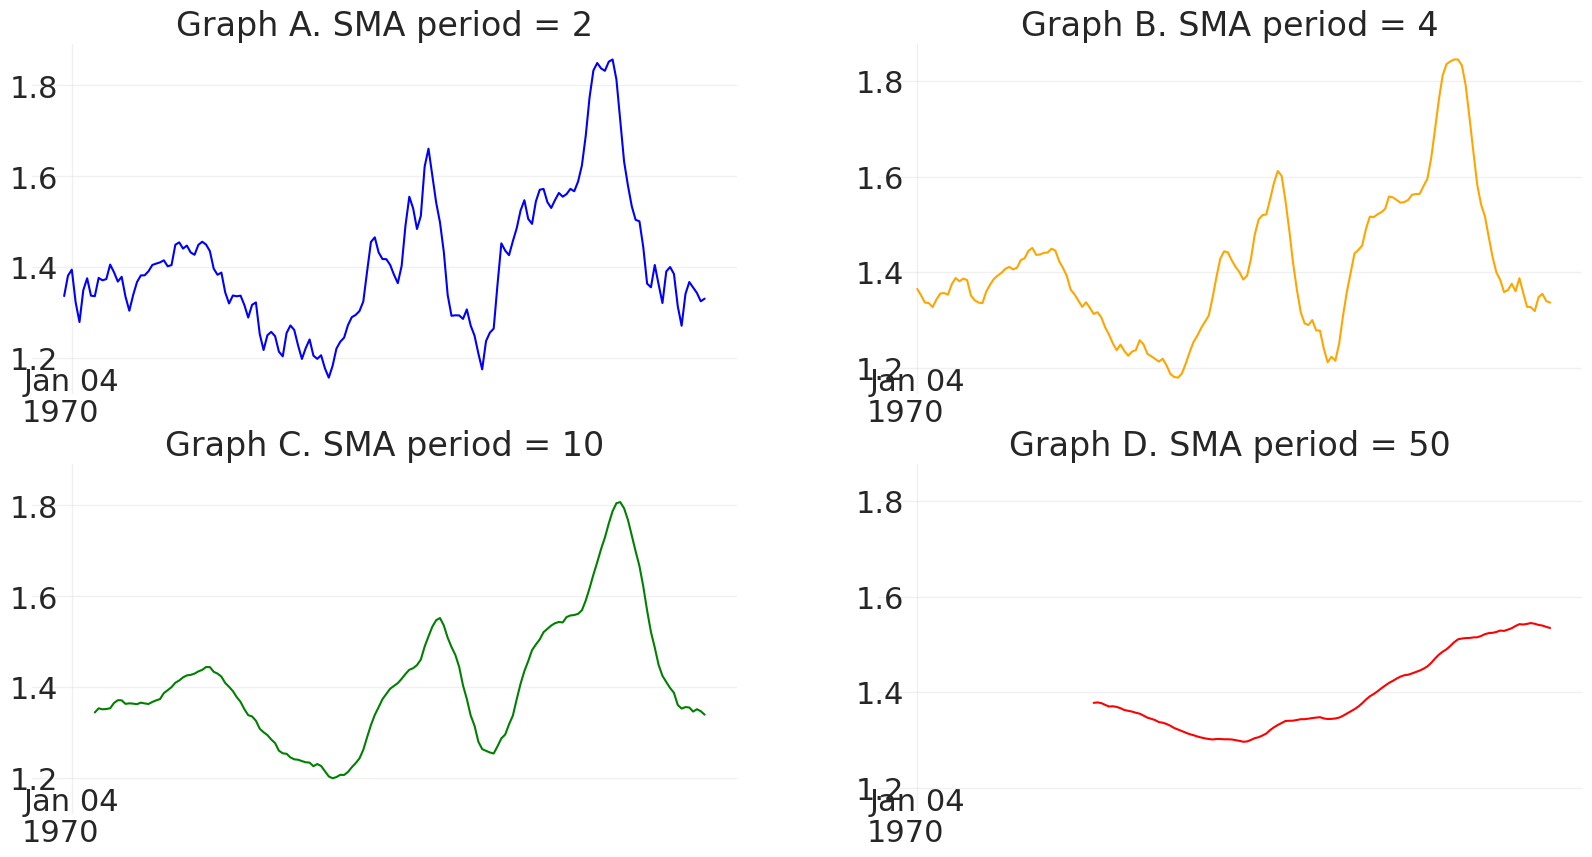

In [17]:
import matplotlib.dates as mdates

# Размер шрифта будет увеличен, фон рисунков станет белым, сетка будет присутствовать и размер графиков будет увеличен
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(26,12)}
        )

sns.despine()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey='col', sharex=True)

# список со значениями периодов и цветами для построения графика
windows = [2, 4, 10, 50]
colors = ['blue', 'orange', 'green', 'red']

# построение графика
for window, ax, color in zip(windows, axes.flatten(), colors):
    ax.plot(avocado_mean.averageprice.rolling(window=window).mean(), label=window, color=color)

# настройка осей и стиля
for ax in axes.flatten():
    ax.set_frame_on(False)
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=1, bymonthday=4))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.xaxis.set_minor_locator(mdates.YearLocator(month=1, day=1))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('\n%Y'))
    ax.grid(True, color='#e2e2e2', alpha=0.5)

# установка заголовков и пометок
for name, ax, window in zip(['A','B','C','D'], axes.flatten(), windows):
    ax.set(title='Graph {}. SMA period = {}'.format(name, window))
    ax.tick_params(labelbottom=True, pad=-25, which='both')

**Примените экспоненциально взвешенную скользящую среднюю с параметром периода, равным 2.**

In [19]:
avocado_ewm = avocado_mean.averageprice.ewm(span=2).mean()

avocado_ewm

,averageprice
0,1.301296
1,1.353310
2,1.379480
3,1.391394
4,1.294758
...,...
164,1.356212
165,1.352194
166,1.340793
167,1.322734


**Подгрузка полного набора данных**

In [20]:
avocado_full = pd.read_csv('avocado_full.csv', index_col=0)

avocado_full

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


**Создайте вспомогательный фрейм данных для органического авокадо, продаваемого только в Чикаго.**

In [21]:
avocado_organic_chi = avocado_full.query('type == "organic" & region == "Chicago"')

avocado_organic_chi

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago


**Рассчитайте SMA с параметром period, равным 4. Какой была цена на 2016-08-21**

In [22]:
test = avocado_organic_chi.AveragePrice.rolling(window=4).mean().round(3) \
    .reset_index()

test[test.Date == '2016-08-21']

,Date,AveragePrice
85,2016-08-21,2.102


**Рассчитайте EWA с параметром period, равным 4. Какой была цена на 2016-08-21**

In [23]:
avocado_organic_chi.AveragePrice.ewm(span=4).mean().round(3) \
    .reset_index().query('Date == "2016-08-21"')

,Date,AveragePrice
85,2016-08-21,2.062


**Рассчитайте EWA с параметром period, равным 4. Какова была цена на 2017-02-19**

In [24]:
avocado_organic_chi.AveragePrice.ewm(span=4).mean().round(3) \
    .reset_index().query('Date == "2017-02-19"')

,Date,AveragePrice
111,2017-02-19,1.562


**Рассчитайте SMA с параметром period, равным 4. Какой была цена на 2017-02-19**


In [25]:
avocado_organic_chi.AveragePrice.rolling(window=4).mean().round(3) \
    .reset_index().query('Date == "2017-02-19"')

,Date,AveragePrice
111,2017-02-19,1.533


**График цены авокадо SMA с параметром period, равным 4. Сохраните результат в jpg-файле.**

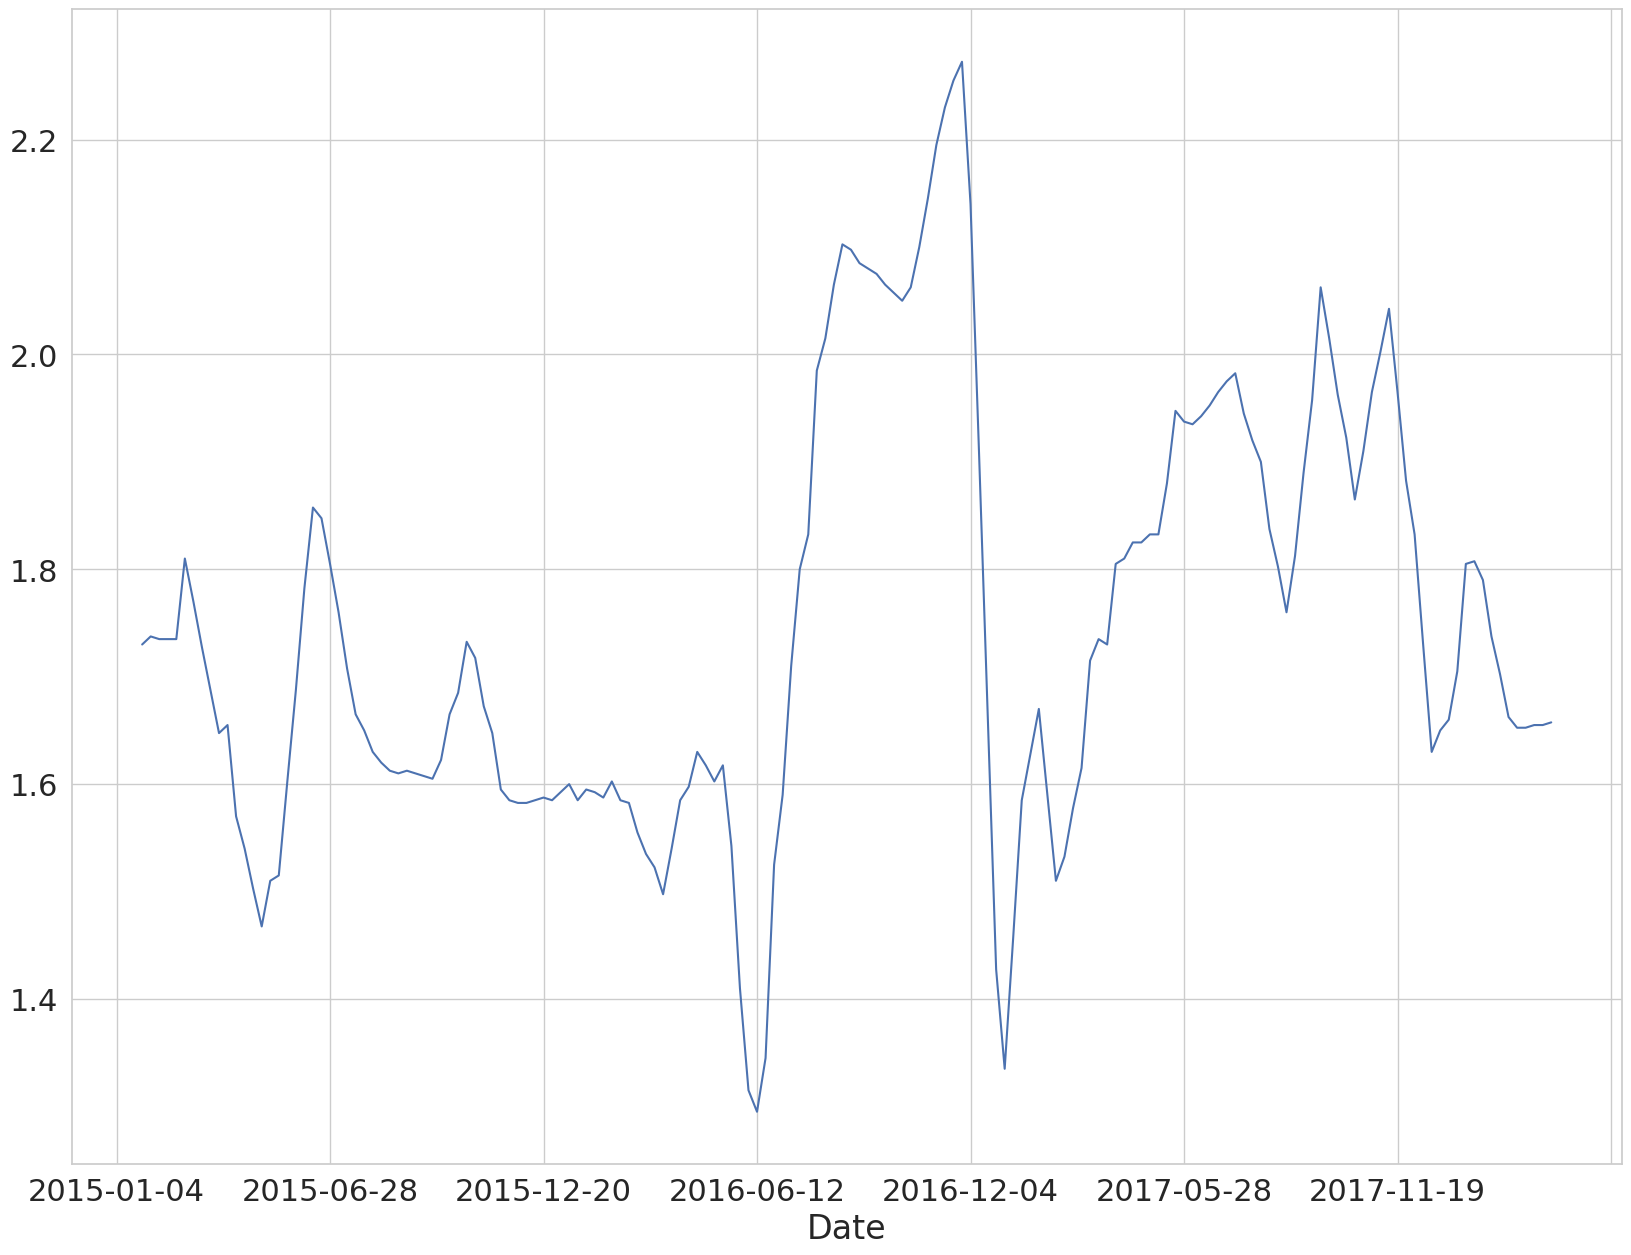

In [26]:
plt.figure(figsize=(20, 15))
avocado_organic_chi.AveragePrice.rolling(window=4).mean().plot()


plt.savefig('avocado_SMA.jpg')

**График цены на авокадо EWA с параметром period, равным 4. Сохраните результат в jpg-файле.**

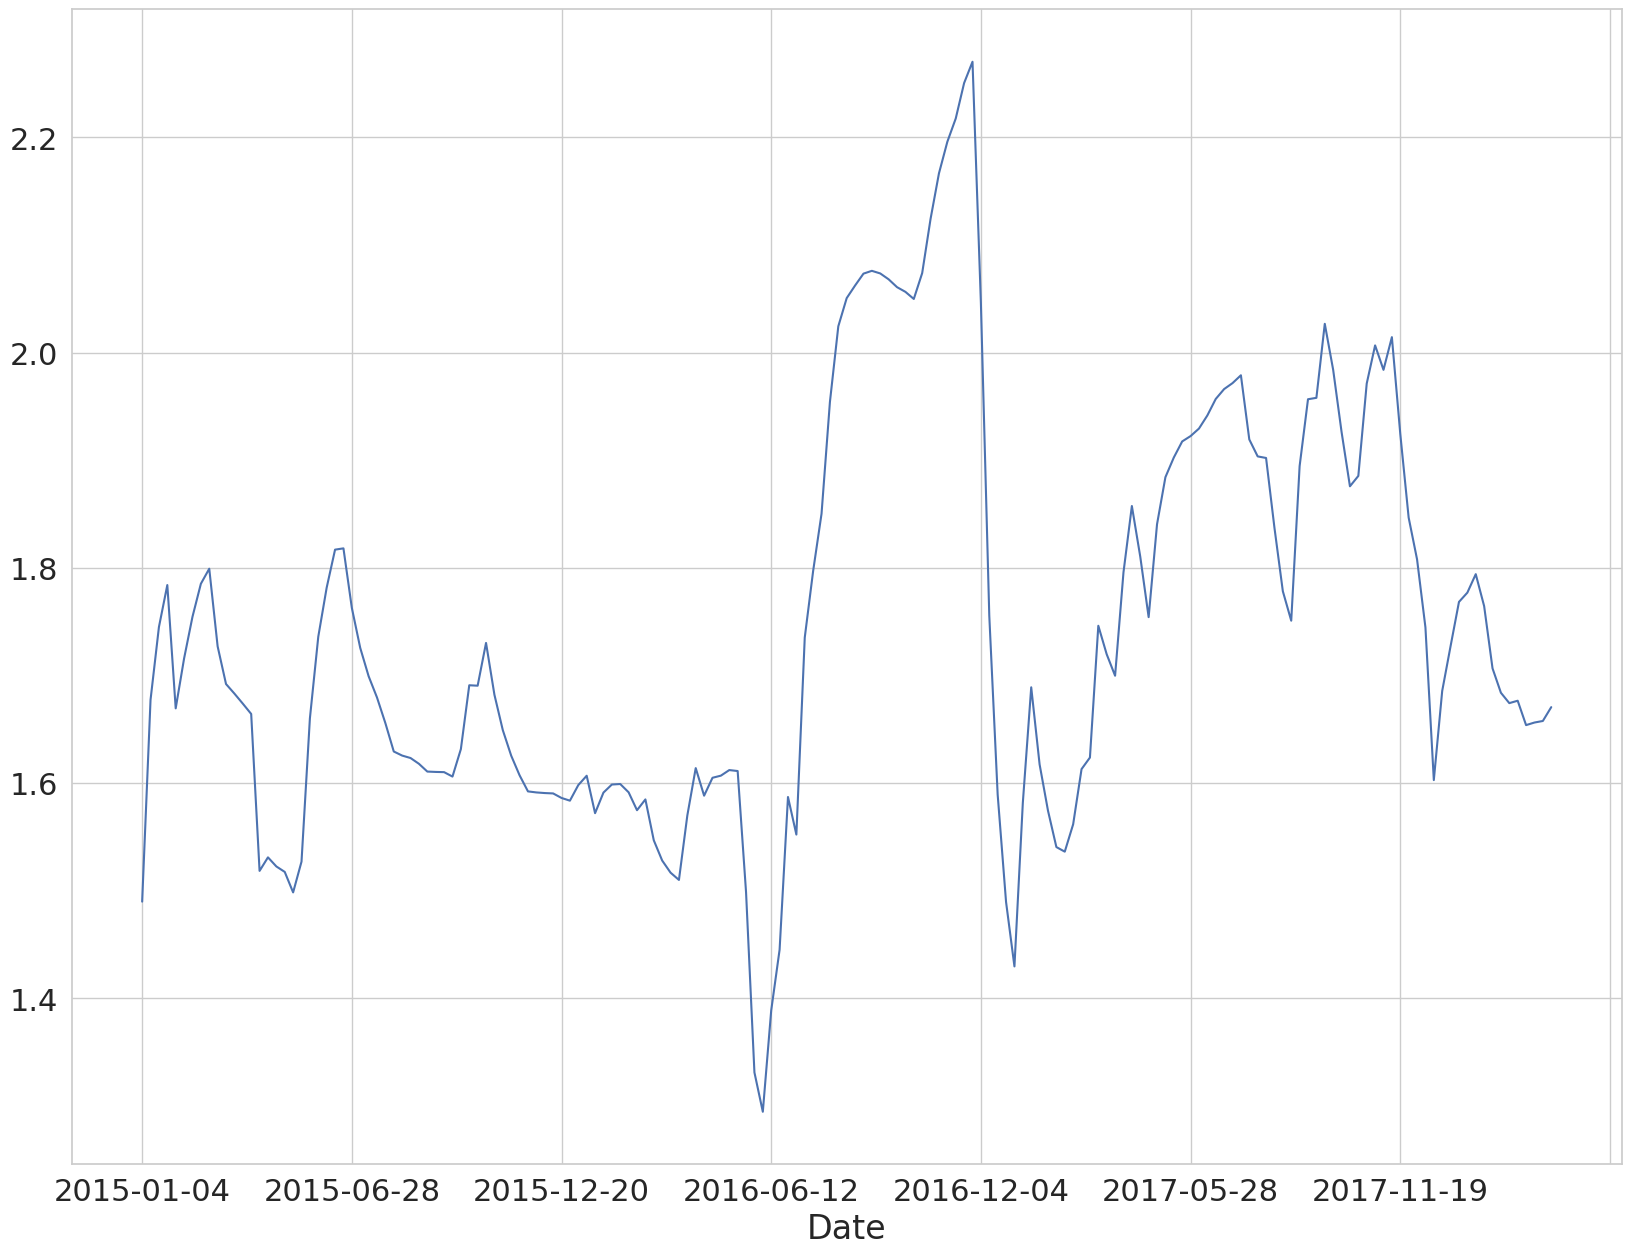

In [27]:
plt.figure(figsize=(20, 15))
avocado_organic_chi.AveragePrice.ewm(span=4).mean().plot()

plt.savefig('avocado_EWA.jpg')

**Загрузить набор данных с информацией о задержках отправки.**

In [29]:
df = pd.read_csv('delays.csv')

df

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [30]:
df.dtypes

,0
client_id,int64
company_id,int64
delay,object
revenue,int64


**Преобразование данных о задержках в формат timedelta**

In [31]:
# удаление знака minutes
df['delay'] = df.delay.str.replace('-', '')

# преобразование задержки в формат timedelta
df['delay'] = pd.to_timedelta(df.delay)

In [32]:
df.dtypes

,0
client_id,int64
company_id,int64
delay,timedelta64[ns]
revenue,int64


In [33]:
df

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129
260,2384,2364,3 days 23:27:14,910660
261,5146,3331,1 days 15:22:34,401137
262,7203,5532,2 days 17:15:02,308979


**Разделите задержки на три категории.**

In [34]:
df['delay_categorical'] = pd.cut(df.delay, 3)

df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


**Теперь распределите данные по четырем категориям и установите соответствующие метки, чтобы сделать вид данных более понятным.**

In [35]:
df['delay_categorical'] = pd.cut(df.delay, pd.to_timedelta(['0d', '1d', '2d', '3d', '106751d']), labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])

In [36]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


**Давайте создадим интерактивную диаграмму с информацией о задержке**

In [45]:
delays_count2 = df.groupby('delay_categorical').agg({'delay_categorical': lambda  x: round(x.count() * 100.0 / df.delay_categorical.count(), 2)}) \
    .rename(columns={'delay_categorical': 'val_counts'}).reset_index()

delays_count2

<ipython-input-45-10566992c198>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,delay_categorical,val_counts
0,less than 1 day,22.35
1,1-2 days,19.32
2,2-3 days,17.80
3,more than 3 days,40.53


In [47]:
import plotly.express as px

px.bar(delays_count2, x="delay_categorical", y="val_counts", title='Частота возникновения типа задержки (в процентах)\n')

<img src='plotly_result.png'>